In [ ]:
#Updating system packages (generally recommended)
!sudo apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [87.8 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3,336 kB]
Hit:14 

In [ ]:
#Installing Java development kit (JDK)
#To run Spark, we need Java Runtime Environment (JRE)
#JDK also includes JRE.
!sudo apt install default-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  default-jdk-headless openjdk-11-jdk
Suggested packages:
  openjdk-11-demo openjdk-11-source visualvm
The following NEW packages will be installed:
  default-jdk default-jdk-headless openjdk-11-jdk
0 upgraded, 3 newly installed, 0 to remove and 55 not upgraded.
Need to get 1,556 kB of archives.
After this operation, 1,614 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 default-jdk-headless amd64 2:1.11-68ubuntu1~18.04.1 [1,132 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 openjdk-11-jdk amd64 11.0.15+10-0ubuntu0.18.04.1 [1,554 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 default-jdk amd64 2:1.11-68

In [ ]:
#Showing Java version
!java -version

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
#Downloading Apache Spark files
#Please note the Spark version (3.0 upwards) 
!wget https://archive.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

#Extracting files
!tar xvf spark-3.0.3-bin-hadoop2.7.tgz

--2022-08-01 05:09:05--  https://archive.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220400553 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.3-bin-hadoop2.7.tgz’

spark-3.0.3-bin-had 100%[===================>] 210.19M  27.7MB/s    in 8.3s    

2022-08-01 05:09:13 (25.3 MB/s) - ‘spark-3.0.3-bin-hadoop2.7.tgz’ saved [220400553/220400553]

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.

In [ ]:
#Installing findspark and pyspark --
#findspark makes pyspark importable as a regular library
!pip install findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 52.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=343c48ade514d08bc51f355d31710d4e061d23ec4c3e8ec6468d733475281abc
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
#Setting the environment path
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"


In [ ]:
#Running a local SparkSession
import findspark
findspark.init()
from pyspark.sql import SparkSession

#Creating a SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
import pandas as pd

Loading Dataset

In [ ]:
#Please make sure that you've uploaded the dataset first to Colab temporary storage
#You may also upload the dataset to your Google Drive. 
#However, you'd need to mount Google Drive to access the dataset 

df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/work/hotel_bookings.csv', inferSchema=True, header=True)
#Let's check out the dataset shape (rows x columns)
print("Dataframe Shape: ", (df.count(), len(df.columns)))

Dataframe Shape:  (119390, 32)


In [ ]:
#Dispalying sample records from the dataset
df.show(5)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type| adr|required_car_parking_spaces|total_

In [ ]:
#Showing dataframe columns
df.columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
#Showing dataframe columns + data types
df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

In [ ]:
print('Data overview')
df.printSchema()
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Data overview
root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: 

,Column Name,Data type
0,hotel,string
1,is_canceled,int
2,lead_time,int
3,arrival_date_year,int
4,arrival_date_month,string
5,arrival_date_week_number,int
6,arrival_date_day_of_month,int
7,stays_in_weekend_nights,int
8,stays_in_week_nights,int
9,adults,int


In [ ]:
print('Data frame describe (string and numeric columns only):')
df.describe().toPandas()

print(f'There are total {df.count()} row, Let print first 2 data rows:')
df.limit(2).toPandas()

Data frame describe (string and numeric columns only):
There are total 119390 row, Let print first 2 data rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01


Detect missing values and abnormal zeroes

In [ ]:
#Finding the count of missing values in each column
from pyspark.sql.functions import when, count, col, isnan
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+
|hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of_special_reque

In [ ]:
# get info from data
df.describe().show()

+-------+------------+-------------------+------------------+------------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------------------+-------------------+--------------------+---------+-------+--------------+--------------------+-------------------+----------------------+------------------------------+------------------+------------------+-------------------+------------+------------------+------------------+--------------------+---------------+------------------+---------------------------+-------------------------+------------------+-----------------------+
|summary|       hotel|        is_canceled|         lead_time| arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|            adults|           children|              babies|     meal|country|market_segment|distribution_channel|  is_repeated_guest|previous_cancellations|pr

In [ ]:
df.describe(['required_car_parking_spaces']).show()

+-------+---------------------------+
|summary|required_car_parking_spaces|
+-------+---------------------------+
|  count|                     119390|
|   mean|        0.06251779881062065|
| stddev|        0.24529114746749414|
|    min|                          0|
|    max|                          8|
+-------+---------------------------+



* required_car_parking_spaces is almost zero

In [ ]:
# custom code to change from pandas to spark
def to_spark(pdf):
  return spark.createDataFrame(pdf)

Exploratory Visualisation

In [ ]:
#We are using two very popular viz libraries matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px


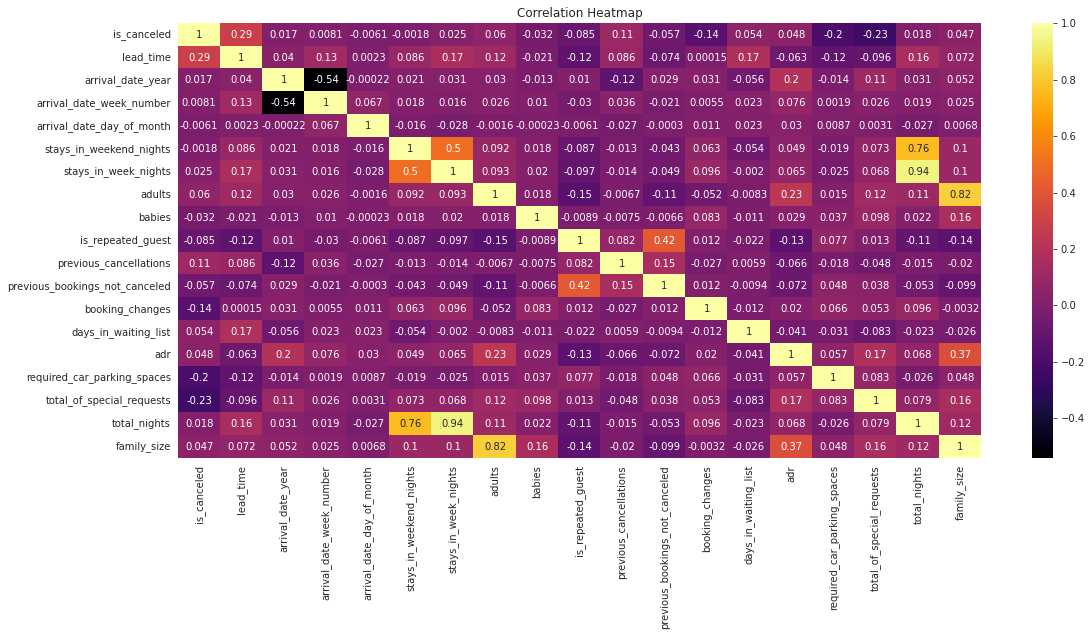

In [ ]:
#Plot 1: Correlation Heatmap
plt.figure(figsize=(18, 8))
# plt.figure(figsize=(30,15))
corrMatrix= df.toPandas().corr(method='pearson') 
#Please note above how the Spark df is easily transformed into a Pandas dataframe
heatmap = sns.heatmap(corrMatrix,  annot=True, cmap='inferno')
heatmap.set_title('Correlation Heatmap')
plt.show()

The mean of each age group in data?

In [ ]:
# # df.groupby(['hotel'])['arrival_date_month'].value_counts()

# df.groupby('adults').#agg({'required_car_parking_spaces': 'mean'}).show()

In [ ]:
df.groupBy("country").count().show()#.head(10)

+-------+-----+
|country|count|
+-------+-----+
|    POL|  919|
|    LVA|   55|
|    BRB|    4|
|    ZMB|    2|
|    JAM|    6|
|    BRA| 2224|
|    ARM|    8|
|    MOZ|   67|
|    CUB|    8|
|    JOR|   21|
|    FRA|10415|
|    ABW|    2|
|    URY|   32|
|    BOL|   10|
|    GIB|   18|
|    LBY|    8|
|    ETH|    3|
|     CN| 1279|
|    ITA| 3766|
|    UKR|   68|
+-------+-----+
only showing top 20 rows



In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

import folium
import matplotlib.pyplot as plt

In [ ]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=384a53833377b304c78628321e11c3506c7e69a862d7a6205f831db94534333a
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=83414271fdbf8a0db959bf46d19834886d8a4173afc36241565bb05b99029829
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek


Text(0, 0.5, 'Number of Hotels')

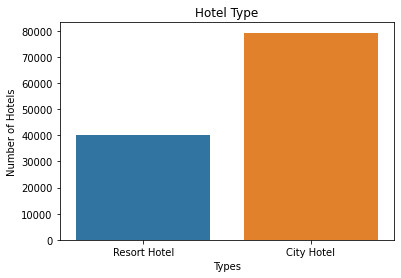

In [ ]:
sns.countplot(x="hotel", data=df.toPandas())
plt.title("Hotel Type")
plt.xlabel("Types")
plt.ylabel("Number of Hotels")

There are more hotels in cities than in resorts.

Text(0, 0.5, 'Number of Cancellations')

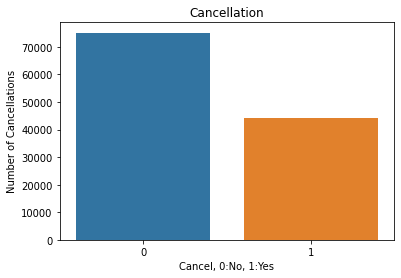

In [ ]:
sns.countplot(x="is_canceled", data = df.toPandas())
plt.title("Cancellation")
plt.xlabel("Cancel, 0:No, 1:Yes")
plt.ylabel("Number of Cancellations")

There were cancellation of more than 4000 reservations.

From where the most guests are coming ?

In [ ]:
country_wise_guests = df.groupBy(['is_canceled', 'country']).count()
country_wise_guests.show()

+-----------+-------+-----+
|is_canceled|country|count|
+-----------+-------+-----+
|          0|    NOR|  426|
|          0|    LVA|   46|
|          0|    UZB|    2|
|          1|    IMN|    2|
|          1|    ISL|    4|
|          0|    BHS|    1|
|          0|    COL|   48|
|          0|    ARG|  160|
|          1|    AGO|  205|
|          1|    SGP|   16|
|          0|    CYP|   40|
|          1|    OMN|    4|
|          0|    GNB|    8|
|          1|    ALB|    2|
|          0|    ARM|    6|
|          0|    IRL| 2543|
|          1|    ARE|   43|
|          0|    NCL|    1|
|          0|    UKR|   48|
|          0|    AIA|    1|
+-----------+-------+-----+
only showing top 20 rows



In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests.toPandas(), locations = 'country',
                           color = 'count', hover_name = 'country')
guests_map.show()

These two hotels are home to guests from all over the world. The majority of the visitors are from Portugal and other European nations.

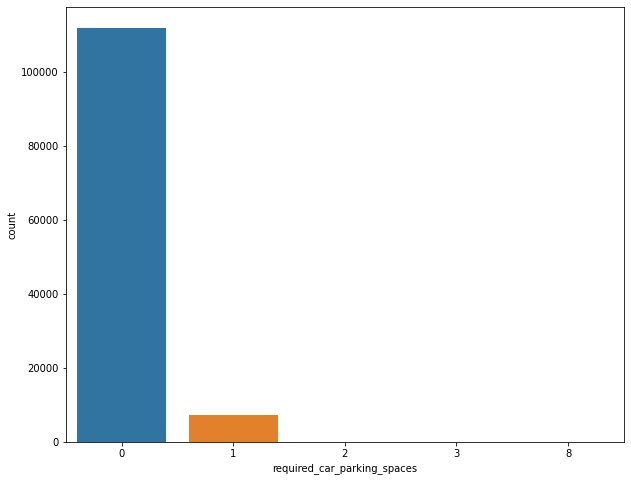

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='required_car_parking_spaces', data = df.toPandas())


Text(0, 0.5, 'Number of Stays')

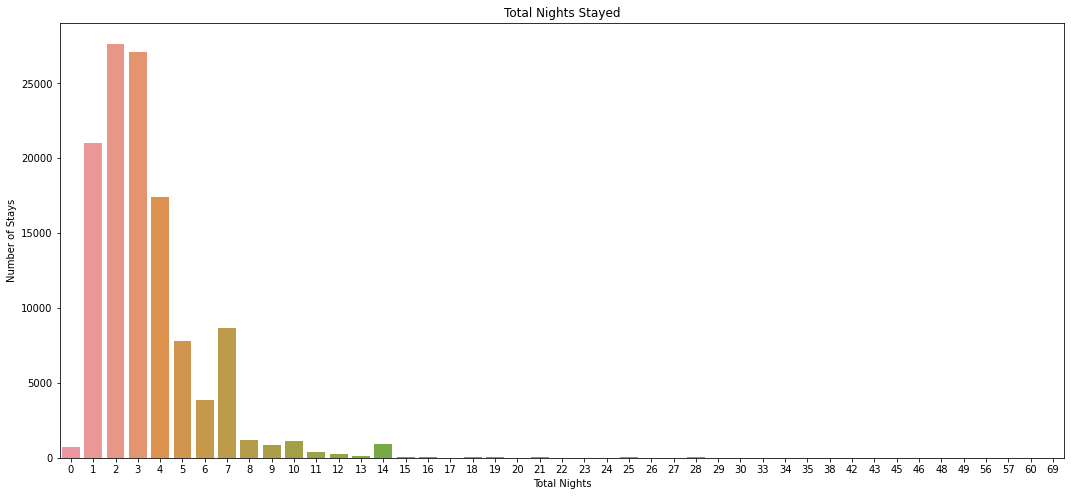

In [ ]:
df = df.withColumn('total_nights' ,df['stays_in_weekend_nights'] + df['stays_in_week_nights'])
plt.figure(figsize=(18,8))
sns.countplot(x='total_nights', data = df.toPandas())
plt.title('Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Number of Stays')

- Most visitors prefer stays of two or three nights.
- Between a 7-night stay and an 8-night stay, there is a significant decrease.

In [ ]:
df.columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'total_nights']

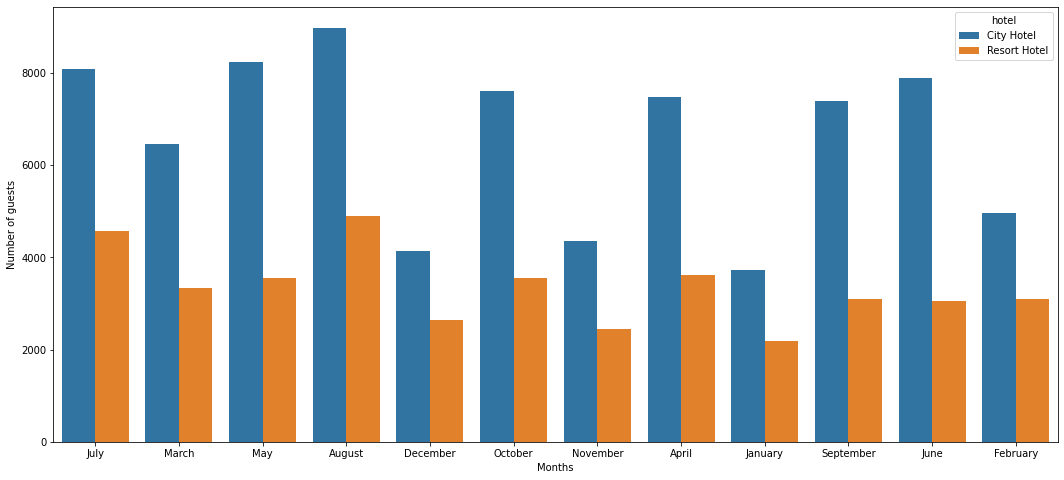

In [ ]:
plt.figure(figsize=(18,8))
grouped_month =  df.groupby(["arrival_date_month", "hotel"]).count().toPandas()#.show()
# grouped_month =  df.groupby("arrival_date_month").count().toPandas()#.show()

sns.barplot(x='arrival_date_month', y='count', hue="hotel", data=grouped_month)
plt.xlabel("Months")
plt.ylabel("Number of guests")
plt.show()

* January is the least popular month and august is the most popular.
* More people visited city hotels than resort hotels.

How does the price vary per night over the year?

In [ ]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [ ]:
resort_hotel = data_resort.groupby('arrival_date_month').agg({'adr':'mean'})#.reset_index()
resort_hotel.show()

+------------------+------------------+
|arrival_date_month|          avg(adr)|
+------------------+------------------+
|              July|150.12252789289084|
|          November| 48.68163967611361|
|          February| 54.14747833622187|
|           January| 48.70891862955038|
|             March|57.012487368830286|
|           October| 61.72750485060146|
|               May| 76.65755818540472|
|            August|  181.205891925084|
|             April| 75.86781568627462|
|              June|107.92186947988277|
|          December|  68.3222359940507|
|         September|  96.4168601332064|
+------------------+------------------+



In [ ]:
city_hotel = data_city.groupby('arrival_date_month').agg({'adr':'mean'})#.reset_index()
city_hotel.show()

+------------------+------------------+
|arrival_date_month|          avg(adr)|
+------------------+------------------+
|              July| 115.5638101212862|
|          November| 86.50045623145421|
|          February| 86.18302545691883|
|           January| 82.16063442768409|
|             March| 90.17072200392947|
|           October|101.74595572976722|
|               May|120.44584188687428|
|            August|118.41208325589949|
|             April|111.85682440846799|
|              June|117.70207512597325|
|          December| 87.85676421404668|
|         September|112.59845221445232|
+------------------+------------------+



In [ ]:
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [ ]:
final_prices = resort_hotel.join(city_hotel,on='arrival_date_month').toPandas()
final_prices.columns=['month','price_for_resort', 'price_for_city_hotel']

# sort month
final_prices = Sort_Dataframeby_Month(df=final_prices,monthcolumnname='month')
final_prices = to_spark(final_prices)

final_prices.show()

+---------+------------------+--------------------+
|    month|  price_for_resort|price_for_city_hotel|
+---------+------------------+--------------------+
|  January| 48.70891862955038|   82.16063442768409|
| February| 54.14747833622187|   86.18302545691883|
|    March|57.012487368830286|   90.17072200392947|
|    April| 75.86781568627462|  111.85682440846799|
|      May| 76.65755818540472|  120.44584188687428|
|     June|107.92186947988277|  117.70207512597325|
|     July|150.12252789289084|   115.5638101212862|
|   August|  181.205891925084|  118.41208325589949|
|September|  96.4168601332064|  112.59845221445232|
|  October| 61.72750485060146|  101.74595572976722|
| November| 48.68163967611361|   86.50045623145421|
| December|  68.3222359940507|   87.85676421404668|
+---------+------------------+--------------------+



In [ ]:
# plot
px.line(final_prices.toPandas(), x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months' )

* This graph makes it abundantly clear that while prices in city hotels vary less 
* and are most expensive in the spring and fall, prices in resort hotels are significantly higher in the summer.

Which are the most busy months?

In [ ]:
resort_guests = data_resort.groupby('arrival_date_month').count()
resort_guests.show()

+------------------+-----+
|arrival_date_month|count|
+------------------+-----+
|              July| 3137|
|          November| 1976|
|          February| 2308|
|           January| 1868|
|             March| 2573|
|           October| 2577|
|               May| 2535|
|            August| 3257|
|             April| 2550|
|              June| 2038|
|          December| 2017|
|         September| 2102|
+------------------+-----+



In [ ]:
city_guests = data_city.groupby('arrival_date_month').count()
city_guests.show()

+------------------+-----+
|arrival_date_month|count|
+------------------+-----+
|              July| 4782|
|          November| 2696|
|          February| 3064|
|           January| 2254|
|             March| 4072|
|           October| 4337|
|               May| 4579|
|            August| 5381|
|             April| 4015|
|              June| 4366|
|          December| 2392|
|         September| 4290|
+------------------+-----+



In [ ]:
final_guests = resort_guests.join(city_guests,on='arrival_date_month').toPandas()
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']

# sort month
final_guests = Sort_Dataframeby_Month(df=final_guests,monthcolumnname='month')
final_guests = to_spark(final_guests)

final_guests.show()

+---------+----------------------+-------------------------+
|    month|no of guests in resort|no of guest in city hotel|
+---------+----------------------+-------------------------+
|  January|                  1868|                     2254|
| February|                  2308|                     3064|
|    March|                  2573|                     4072|
|    April|                  2550|                     4015|
|      May|                  2535|                     4579|
|     June|                  2038|                     4366|
|     July|                  3137|                     4782|
|   August|                  3257|                     5381|
|September|                  2102|                     4290|
|  October|                  2577|                     4337|
| November|                  1976|                     2696|
| December|                  2017|                     2392|
+---------+----------------------+-------------------------+



In [ ]:
px.line(final_guests.toPandas(), x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', )


* From June to September, when prices are at their highest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels.

* More people stay at the City hotel in the spring and fall when the rates are also the highest. Less people visit in July and August, but prices are still lower.

* Summer starts from June and ends on September 

### Objectives.

Focus: How car parking is used.

  - And how different length of stays and family size affects the usage of car parking.

In [ ]:
# df.groupby('total_nights').#['adults','children','babies',]).agg('sum')
df = df.withColumn("family_size", (col("adults") + col("children") + col("babies")).alias("sum"))#.show()
df.select("family_size").show(3)

+-----------+
|family_size|
+-----------+
|        2.0|
|        2.0|
|        1.0|
+-----------+
only showing top 3 rows



In [ ]:
df.show(5)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+------------+-----------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type| adr|required_

In [ ]:
from pyspark.sql.functions import *
# from pyspark.sql.types import *

Does the holiday period has an influence on hotel booking or do people travel more during the holiday period?

In [ ]:
# split reservation_status_date into year, month and day
split(df['reservation_status_date'], '-')  

split_date=split(df['reservation_status_date'], '-')  
df= df.withColumn('Year', split_date.getItem(0))
df= df.withColumn('Month', split_date.getItem(1))
df= df.withColumn('Day', split_date.getItem(2))

In [ ]:
df.show(5)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+------------+-----------+----+-----+---+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type

In [ ]:
# df.select("Month").distinct().show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+------------+-----------+----+-----+---+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type

Text(0, 0.5, 'Number of Occupants')

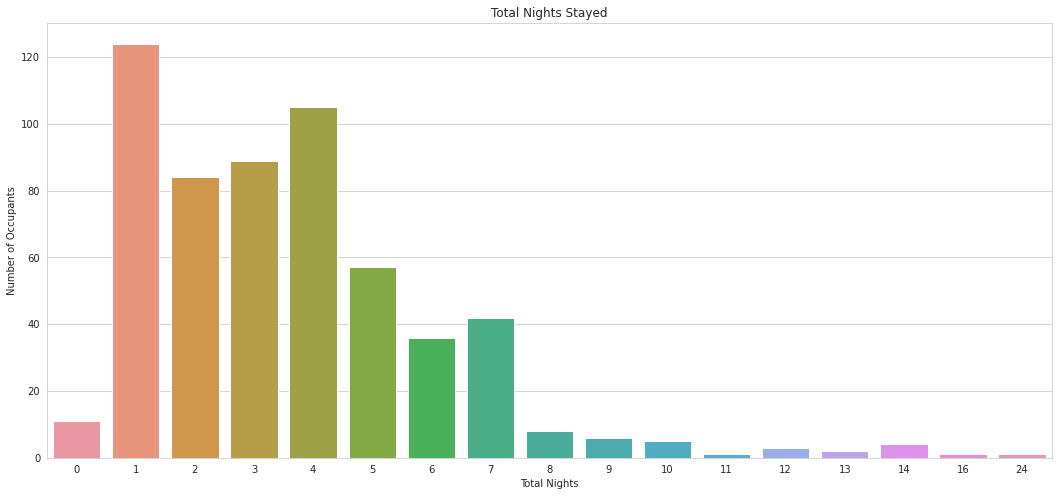

In [ ]:
# christmas day

# summer time, Summer starts from June and ends on September
# filter_values_list_dec_days =["24","25","26", "27"]
filter_values_list_dec_days =[24,25,26,27]
december_24_to_27 = df.filter(df.Month == "12").filter(df.Day.isin(filter_values_list_dec_days)) #df.filter(df.Month == 6)
december_24_to_27.show(1)


# december_25 = df.filter(df.Month == "12").filter(df.Day=="25")
# december_25.show(1)

# plot
plt.figure(figsize=(18,8))
sns.countplot(x='total_nights', data = december_24_to_27.toPandas())
plt.title('Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Number of Occupants')


In December 24 - 27
* Most visitors prefer stays of one or four nights.
* Between a 7-night stay and an 9-night stay, there is a significant decrease.

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+-----+---------------------------+-------------------------+------------------+-----------------------+------------+-----------+----+-----+---+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_typ

Text(0, 0.5, 'Number of Occupants')

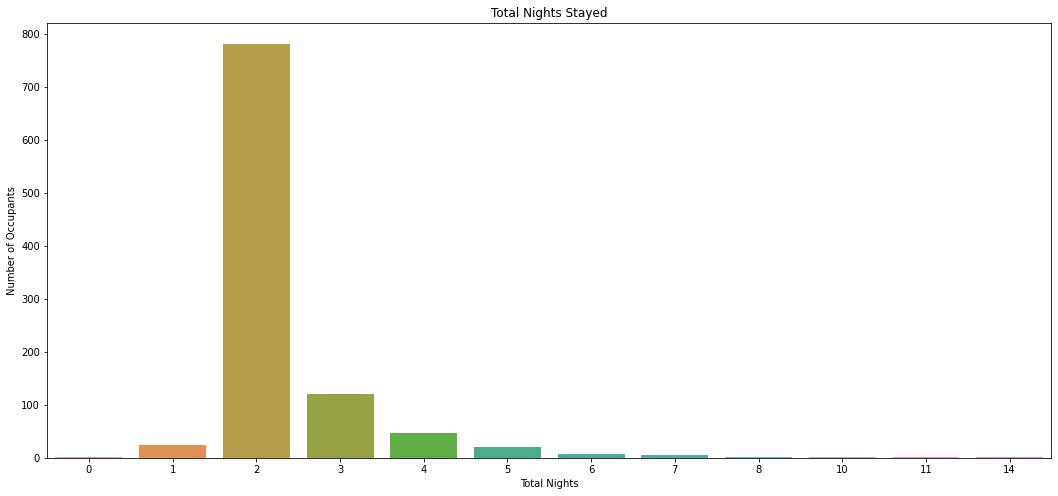

In [ ]:
# New Year's Day
january_1 = df.filter(df.Month == "01").filter(df.Day=="01")
january_1.show(1)

# plot
plt.figure(figsize=(18,8))
sns.countplot(x='total_nights', data = january_1.toPandas())
plt.title('Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Number of Occupants')

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+------------+-----------+----+-----+---+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning:

All-NaN slice encountered



Text(0, 0.5, 'Number of Occupants')

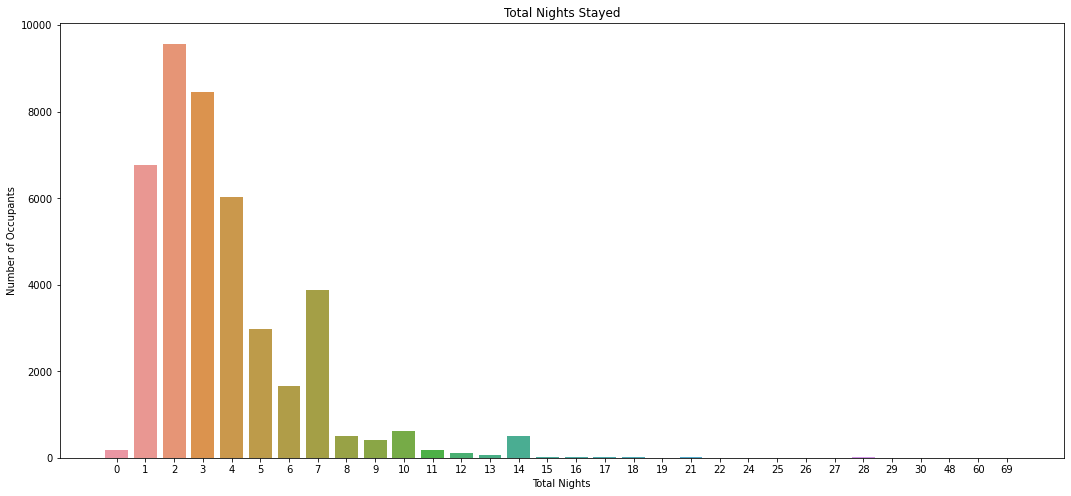

In [ ]:
# summer time, Summer starts from June and ends on September
filter_values_list =["06","07","08", "09"]
summer_time = df.filter(df.Month.isin(filter_values_list)) #df.filter(df.Month == 6)
summer_time.show(1)

# plot
plt.figure(figsize=(18,8))
sns.countplot(x='total_nights', data = summer_time.toPandas())
sns.lineplot(x='required_car_parking_spaces', data = summer_time.toPandas())
plt.title('Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Number of Occupants')

During Summer time
* Most visitors prefer stays of 2, 3, 1 or 4 nights.
* After the 14-night stay, there is a significant decrease.

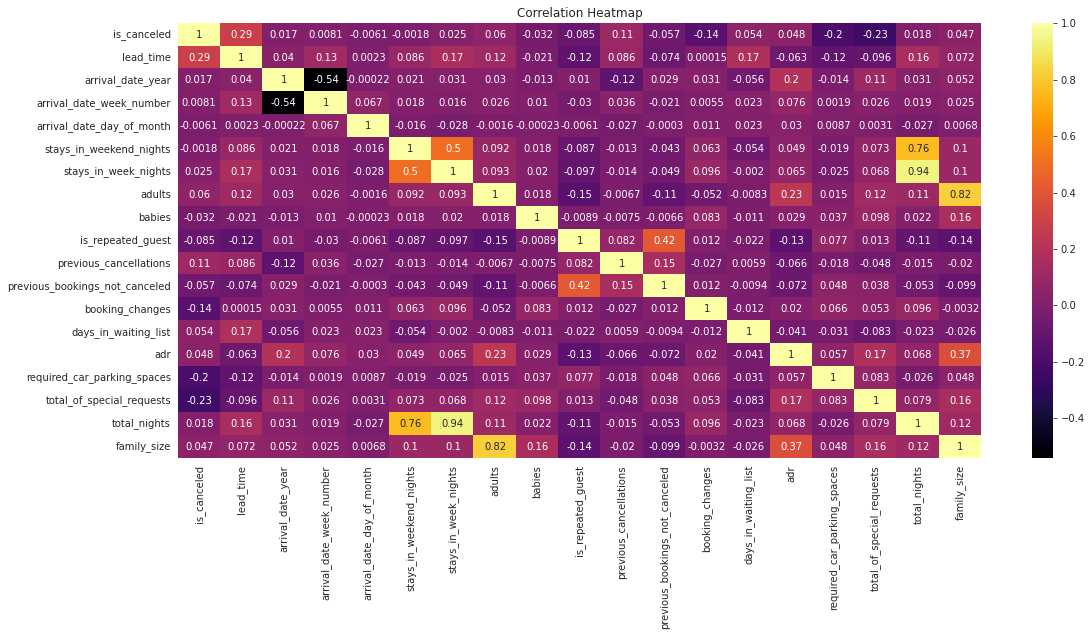

In [ ]:
#Plot 1: Correlation Heatmap
plt.figure(figsize=(18, 8))
# plt.figure(figsize=(30,15))
corrMatrix= df.toPandas().corr(method='pearson') 
#Please note above how the Spark df is easily transformed into a Pandas dataframe
heatmap = sns.heatmap(corrMatrix,  annot=True, cmap='inferno')
heatmap.set_title('Correlation Heatmap')
plt.show()

In [ ]:
df.columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'total_nights',
 'family_size',
 'Year',
 'Month',
 'Day']

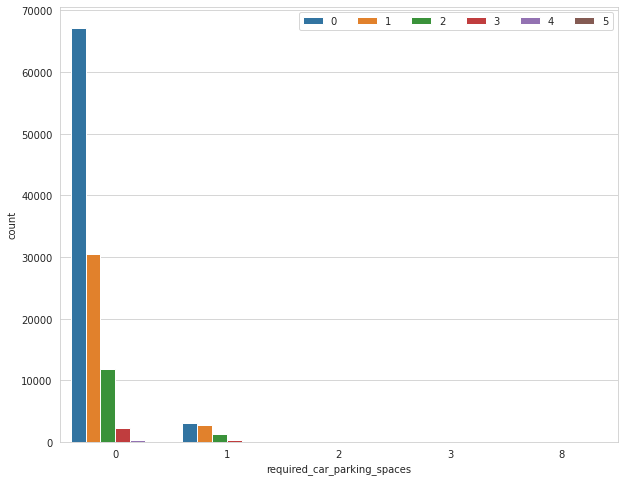

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='required_car_parking_spaces', hue='total_of_special_requests', data = df.toPandas())
plt.legend(loc="upper right" )


<Figure size 720x576 with 0 Axes>

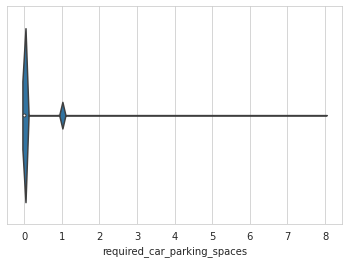

In [ ]:
plt.figure(figsize=(10,8))
# sns.countplot(x='family_size', hue='required_car_parking_spaces', data = df.toPandas())

f, ax = plt.subplots()
sns.violinplot(x='required_car_parking_spaces',data=df.toPandas())
# sns.despine(offset=10, trim=True);

In [ ]:
sns.pieplot(x='required_car_parking_spaces', data = df.toPandas())


AttributeError: ignored

In [ ]:
df.columns


['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'total_nights',
 'family_size',
 'Year',
 'Month',
 'Day']

In [ ]:
df.select("required_car_parking_spaces").distinct().show()

+---------------------------+
|required_car_parking_spaces|
+---------------------------+
|                          1|
|                          3|
|                          8|
|                          2|
|                          0|
+---------------------------+



In [ ]:
df.columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'total_nights',
 'family_size',
 'Year',
 'Month',
 'Day']

Text(0, 0.5, 'Number of Cancellations')

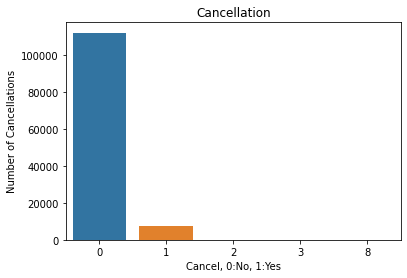

In [ ]:
# a data visulization of the car parking
sns.countplot(x="required_car_parking_spaces", data = df.toPandas())
plt.title("Cancellation")
plt.xlabel("Cancel, 0:No, 1:Yes")
plt.ylabel("Number of Cancellations")

Spaces needed being dependent on the length of stay

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning:

All-NaN slice encountered



Text(0, 0.5, 'Number of Cancellations')

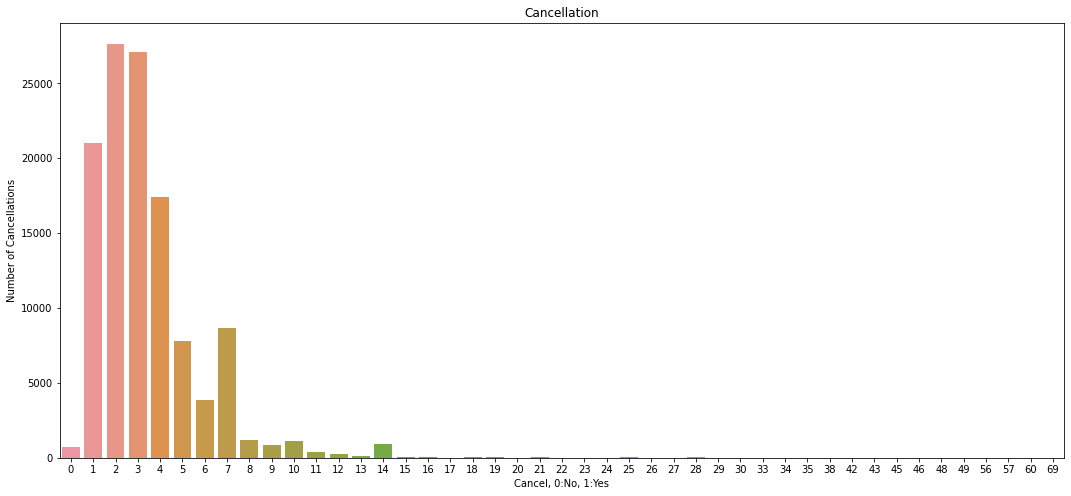

In [ ]:
# a data visulization of the car parking
plt.figure(figsize=(18,8))

sns.lineplot(x="required_car_parking_spaces", data = df.toPandas())

sns.countplot(x="total_nights", data = df.toPandas())
# sns.countplot(x="required_car_parking_spaces", data = df.toPandas())

plt.title("Cancellation")
plt.xlabel("Cancel, 0:No, 1:Yes")
plt.ylabel("Number of Cancellations")

In [ ]:
df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+------------+-----------+----+-----+---+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_ty